In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import signal

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from  matplotlib import patches
from matplotlib.figure import Figure
from matplotlib import rcParams
from scipy import signal
    
def zplane(b,a,filename=None):
    """Plot the complex z-plane given a transfer function.
    """

    # get a figure/plot
    ax = plt.subplot(111)

    # create the unit circle
    uc = patches.Circle((0,0), radius=1, fill=False,
                        color='black', ls='dashed')
    ax.add_patch(uc)

    # The coefficients are less than 1, normalize the coeficients
    if np.max(b) > 1:
        kn = np.max(b)
        b = b/float(kn)
    else:
        kn = 1

    if np.max(a) > 1:
        kd = np.max(a)
        a = a/float(kd)
    else:
        kd = 1
        
    # Get the poles and zeros
    p = np.roots(a)
    z = np.roots(b)
    k = kn/float(kd)
    
    # Plot the zeros and set marker properties    
    t1 = plt.plot(z.real, z.imag, 'go', ms=10)
    plt.setp( t1, markersize=10.0, markeredgewidth=1.0,
              markeredgecolor='k', markerfacecolor='g')

    # Plot the poles and set marker properties
    t2 = plt.plot(p.real, p.imag, 'rx', ms=10)
    plt.setp( t2, markersize=12.0, markeredgewidth=3.0,
              markeredgecolor='r', markerfacecolor='r')

    ax.spines['left'].set_position('center')
    ax.spines['bottom'].set_position('center')
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

    # set the ticks
    r = 1.5; plt.axis('scaled'); plt.axis([-r, r, -r, r])
    ticks = [-1, -.5, .5, 1]; plt.xticks(ticks); plt.yticks(ticks)
    ax.set_title('Zeros/Poles of Z transform')

    if filename is None:
        plt.show()
    else:
        plt.savefig(filename)
    

    return z, p, k

def filterResponse(b,a):
    w,h=signal.freqz(b,a)
    fig = plt.figure()
    plt.title('Digital filter frequency response')
    ax1 = fig.add_subplot(111)
    plt.plot(w, 20 * np.log10(abs(h)), 'b')
    plt.ylabel('Amplitude [dB]', color='b')
    plt.xlabel('Frequency [rad/sample]')
    ax2 = ax1.twinx()
    angles = np.unwrap(np.angle(h))
    plt.plot(w, angles, 'g')
    plt.ylabel('Angle (radians)', color='g')
    plt.grid()
    plt.axis('tight')
    
def impulseResponse(b,a,N=0):
    if N==0:
        N=len(b)
    impulse=np.zeros(N)
    impulse[0]=1
    impulR=signal.lfilter(b,a,impulse)
    
    plt.figure()
    plt.subplot(211)
    plt.plot(impulR,'b.-',label='Impulse response')
    plt.title('Impulse and Step Response')
    plt.ylabel('Impulse')
    plt.legend()
    plt.subplot(212)
    plt.plot(np.cumsum(impulR),'b.-',label='Step response')
    plt.ylabel('Step')
    plt.xlabel('samples')
    plt.legend()
    plt.tight_layout()
    



# Filters

IIR, Butterworth filter

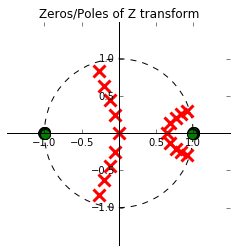

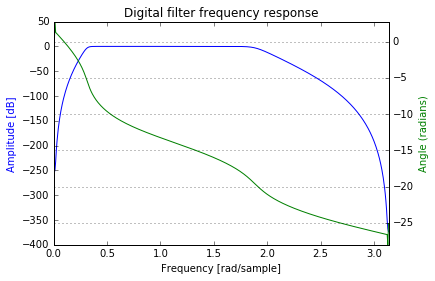

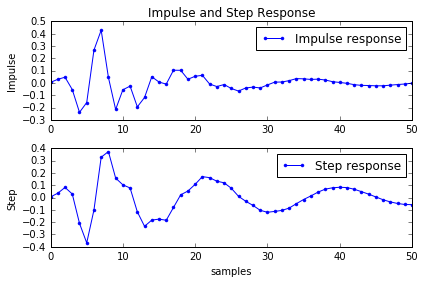

In [3]:
fs=100
lowcut=5
highcut=30

order=9
b,a=signal.butter(order,[2*lowcut/fs,2*highcut/fs],btype='bandpass')

zplane(b,a)
filterResponse(b,a)
impulseResponse(b,a,51)

IIR, Bessel filter

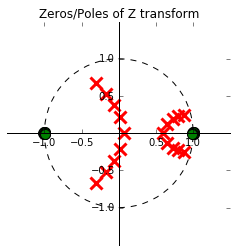

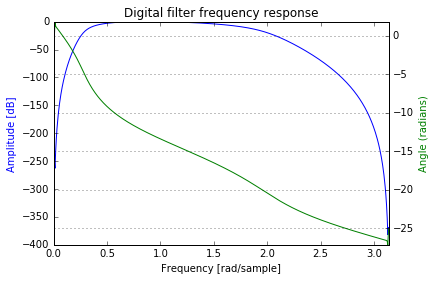

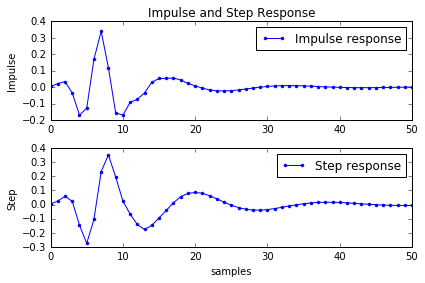

In [4]:
fs=100
lowcut=5
highcut=30

order=9
b,a=signal.bessel(order,[2*lowcut/fs,2*highcut/fs],btype='bandpass')

zplane(b,a)
filterResponse(b,a)
impulseResponse(b,a,51)

IIR, Chebyshev type I filter

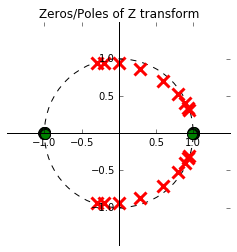

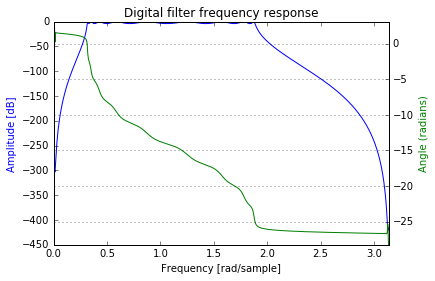

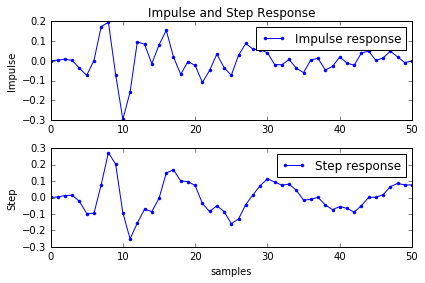

In [5]:
fs=100
lowcut=5
highcut=30

order=9
ripple=4
b,a=signal.cheby1(order,ripple,[2*lowcut/fs,2*highcut/fs],btype='bandpass')

zplane(b,a)
filterResponse(b,a)
impulseResponse(b,a,51)

FIR filter

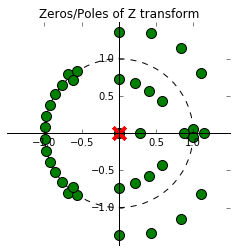

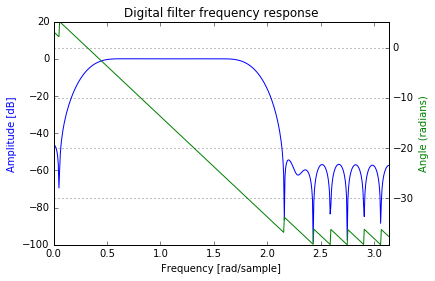

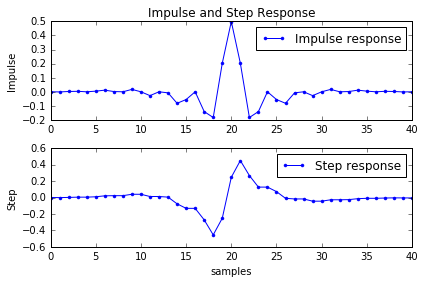

In [6]:
fs=100
lowcut=5
highcut=30

numtaps=41
b=signal.firwin(numtaps, [2*lowcut/fs, 2*highcut/fs], pass_zero=False)
a=np.zeros_like(b)
a[0]=1

zplane(b,a)
filterResponse(b,a)
impulseResponse(b,a)

# Note: the impulse response of a FIR filter is just the numerator coefficients of its Z transform!

# Apply filter, Phase delay/distortion

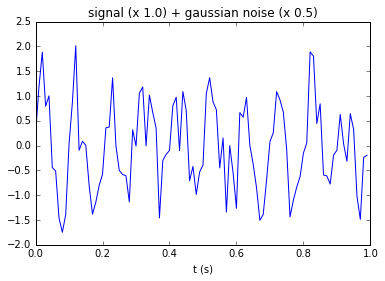

In [7]:
fs = 100.0
lowcut = 5.0
highcut = 20.0

T = 1
nsamples = T * fs
t = np.linspace(0, T, nsamples, endpoint=False)
a = 0.02
f0 = 10.0
original = np.sin(2 * np.pi *f0* t)
noise=np.random.randn(len(original))*0.5
original += noise
# x += 0.01 * np.cos(2 * np.pi * 312 * t + 0.1)
# x += a * np.cos(2 * np.pi * f0 * t + .11)
# x += 0.03 * np.cos(2 * np.pi * 2000 * t)

plt.plot(t,original)
plt.title('signal (x 1.0) + gaussian noise (x 0.5)')
plt.xlabel('t (s)')

For IIR filter, the phase delay is not linear, meaning that the phase will be distorted and delayed. To make a zero-phase filtered result, a backward filter is applied after the forward filtered result, using the same filter parameters.

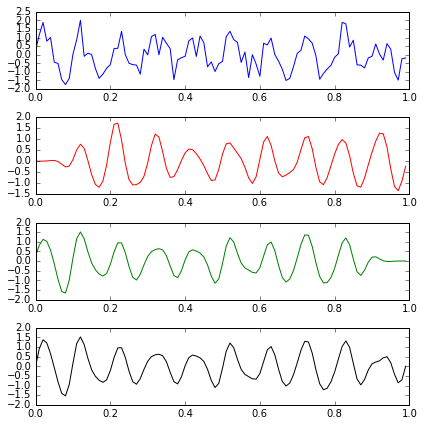

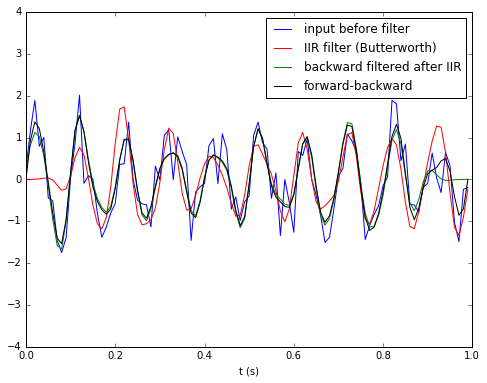

In [8]:
order=9
bb,ab=signal.butter(order,[2*lowcut/fs,2*highcut/fs],btype='bandpass')
filterXb=signal.lfilter(bb,ab,original)

filterXb1=signal.lfilter(bb,ab,filterXb[::-1])[::-1]

filterXb2=signal.filtfilt(bb,ab,original)


fig=plt.figure(figsize=[6,6])
ax=fig.add_subplot(411)
ax.plot(t,original)
ax1=fig.add_subplot(412)

ax1.plot(t,filterXb,'r')

ax2=fig.add_subplot(413)
ax2.plot(t,filterXb1,'g')
ax2.set_xlim(0,1)

ax3=fig.add_subplot(414)
ax3.plot(t,filterXb2,'k')

plt.tight_layout()


plt.figure(figsize=[8,6])
plt.plot(t,original,'b-',label='input before filter')
plt.plot(t,filterXb,'r-',label='IIR filter (Butterworth)')
plt.plot(t,filterXb1,'g-',label='backward filtered after IIR')
plt.plot(t,filterXb2,'k-',label='forward-backward')
plt.ylim(-4,4)
plt.xlim(0,1)
plt.xlabel('t (s)')
plt.legend()



For FIR filter, if the coefficient is symmetric (usually it is), there is linear phase delay. To make a zero-phase result, we can either, 1. shifter the result by 0.5*(Numtaps-1)/fs, or 2. use a forward-backward filter. The diadvantage of forward-backward filter is that you need to have the full wave, in order to flip it and apply the filter in a backward manner.

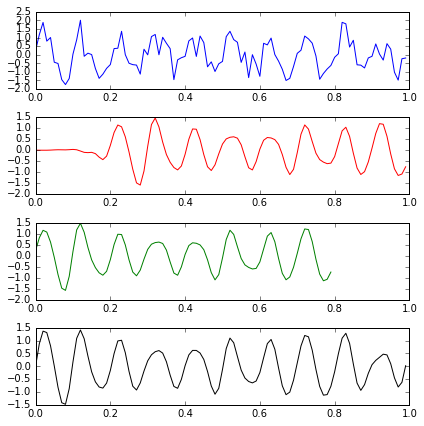

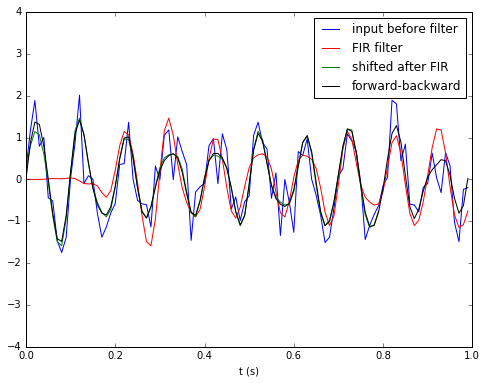

In [9]:
numtaps=41
bf=signal.firwin(numtaps, [2*lowcut/fs,2*highcut/fs], pass_zero=False)
af=np.zeros_like(bf)
af[0]=1
filterXb=signal.lfilter(bf,af,original)

# filterXb1=signal.lfilter(bf,af,filterXb[::-1])[::-1]

filterXb2=signal.filtfilt(bf,af,original,padlen=31)

tdelay=0.5*(numtaps-1)/fs

fig=plt.figure(figsize=[6,6])
ax=fig.add_subplot(411)
ax.plot(t,original)
ax1=fig.add_subplot(412)

ax1.plot(t,filterXb,'r')

ax2=fig.add_subplot(413)
ax2.plot(t-tdelay,filterXb,'g')
ax2.set_xlim(0,1)

ax3=fig.add_subplot(414)
ax3.plot(t,filterXb2,'k')

plt.tight_layout()


plt.figure(figsize=[8,6])
plt.plot(t,original,'b-',label='input before filter')
plt.plot(t,filterXb,'r-',label='FIR filter')
plt.plot(t-tdelay,filterXb,'g-',label='shifted after FIR')
plt.plot(t,filterXb2,'k-',label='forward-backward')
plt.ylim(-4,4)
plt.xlim(0,1)
plt.xlabel('t (s)')
plt.legend()


# applying filter is the same as convolve with impulse response

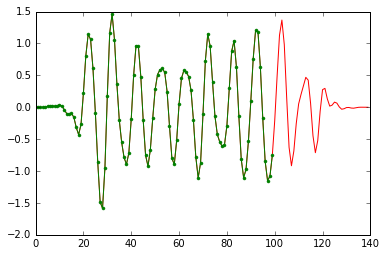

In [10]:
aa=signal.convolve(original,bf)
#plt.plot(x)
plt.plot(aa[:],'r')
plt.plot(filterXb,'g.-')


In [11]:
%timeit signal.convolve(original,bf)

The slowest run took 4.46 times longer than the fastest. This could mean that an intermediate result is being cached.
100000 loops, best of 3: 10.4 µs per loop


In [12]:
%timeit signal.lfilter(bf,1,original)

10000 loops, best of 3: 59.6 µs per loop
